# ANALYSING CLEANSING DATA

The cleansing data shows the cleansing events requested in Westminster. These are normally improper waste disposal or 
any form or littering or vandalism in the borough. Analysing this dataset will help in establising areas where cleansing
events are most requested, to assist Westminster City Council to take the necessary action to reduce such acts and also
help Westminster save costs on cleansing activities.

# SECTION A

In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import pysal
from shapely.geometry import Point

In [3]:
#reading dataframe from another notebook titled ALL FILES
%store -r cleansing

In [4]:
#reading shapefile from another notebook titled LICENCE in section A
%store -r complete_wards

In [5]:
#reading London wards shapefile dataframe from another notebook title ACORN in section A
%store -r london

In [6]:
#checking the contents of the dataframe
cleansing.head(2)

,EventID,Street,Ward,StressArea,Lat,Long,Service,EventType,EventDate,EventDayOfWeek,EventDayOfWeekNumber,EventMonth,EventMonthNumber,EventYear,EventTime,EventTimeHourGroup
0,1828256,Kilburn Park Road,Kilburn,Not Recorded,51.532165,-0.193718,Street Scene,Abandoned Waste,2014-10-22,Wed,3,Oct,10,2014,15:40,15:00 - 16:00
1,1828258,Kilburn Park Road,Kilburn,Not Recorded,51.532165,-0.193718,Street Scene,Abandoned Waste,2014-10-22,Wed,3,Oct,10,2014,15:41,15:00 - 16:00


In [6]:
#filtering the timehourband for evening economy
evening_cleansing  = cleansing[(cleansing.EventTime>='18:00') & (cleansing.EventTime<='20:00')]

In [7]:
#filtering complaints made at night. That is between 20:00 and 04:00
ngt_cleansing1 = cleansing[(cleansing.EventTime>='20:00') & (cleansing.EventTime<='23:59')]
ngt_cleansing2 = cleansing[(cleansing.EventTime>='00:00') & (cleansing.EventTime<='04:00')]

In [8]:
#joining the two segments of received time to represent night-time complaints
night_cleansing = pd.concat([ngt_cleansing1,ngt_cleansing2])

In [9]:
#creating geometry points of dataframe
evening_cleansing['geometry'] = [Point(xy) for xy in zip(evening_cleansing.Long, evening_cleansing.Lat)]

#creating a geodataframe and setting to the right coordinate reference system (crs)
evening_cleansing_geo = gpd.GeoDataFrame(evening_cleansing, crs={'init' :'epsg:4326'})

#setting both dataframes to same crs
evening_cleansing_geo = evening_cleansing_geo.to_crs(london.crs)

#creating a spatial join of shape file and geodataframe
evening_cleansing_join = gpd.sjoin(evening_cleansing_geo, london, how="inner", op='intersects')


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
#creating geometry points of dataframe
night_cleansing['geometry'] = [Point(xy) for xy in zip(night_cleansing.Long, night_cleansing.Lat)]

#creating a geodataframe and setting to the right coordinate reference system (crs)
night_cleansing_geo = gpd.GeoDataFrame(night_cleansing, crs={'init' :'epsg:4326'})

#setting both dataframes to same crs
night_cleansing_geo = night_cleansing_geo.to_crs(london.crs)

#creating a spatial join of shape file and geodataframe
night_cleansing_join = gpd.sjoin(night_cleansing_geo, london, how="inner", op='intersects')

In [11]:
#counting event type by ward
ward_cleanse = pd.DataFrame(evening_cleansing_join.groupby(['Ward','EventType'])['EventType'].count())

In [12]:
#counting event type by ward
ward_cleanse2 = pd.DataFrame(night_cleansing_join.groupby(['Ward','EventType'])['EventType'].count())

In [13]:
#renaming column
ward_cleanse = ward_cleanse.rename(columns={'EventType':'Total'})

In [14]:
#renaming column
ward_cleanse2 = ward_cleanse2.rename(columns={'EventType':'Total'})

In [15]:
#resetting index
ward_cleanse_total = ward_cleanse.reset_index()

In [16]:
#resetting index
ward_cleanse_total2 = ward_cleanse2.reset_index()

In [17]:
#checking contents
ward_cleanse_total.EventType.unique()

array(['Abandoned Waste', 'Dog Fouling',
       'Flyposting, Graffiti, Sticker Removal Request', 'Sweeping Request',
       'Urgent Emergency Service', 'Street Washing', 'Sharps',
       'Hazardous Waste'], dtype=object)

In [18]:
#filtering event type for evening
waste = evening_cleansing_join[evening_cleansing_join.EventType=='Abandoned Waste']
Fouling = evening_cleansing_join[evening_cleansing_join.EventType=='Dog Fouling']
Graffiti = evening_cleansing_join[evening_cleansing_join.EventType=='Flyposting, Graffiti, Sticker Removal Request']
Sweeping = evening_cleansing_join[evening_cleansing_join.EventType=='Sweeping Request']
Urgent = evening_cleansing_join[evening_cleansing_join.EventType=='Urgent Emergency Service']
Washing = evening_cleansing_join[evening_cleansing_join.EventType=='Street Washing']
Sharps = evening_cleansing_join[evening_cleansing_join.EventType=='Sharps']
Hazardous = evening_cleansing_join[evening_cleansing_join.EventType=='Hazardous Waste']

In [19]:
#filtering event type for night
waste2 = night_cleansing_join[night_cleansing_join.EventType=='Abandoned Waste']
Fouling2 = night_cleansing_join[night_cleansing_join.EventType=='Dog Fouling']
Graffiti2 = night_cleansing_join[night_cleansing_join.EventType=='Flyposting, Graffiti, Sticker Removal Request']
Sweeping2 = night_cleansing_join[night_cleansing_join.EventType=='Sweeping Request']
Urgent2 = night_cleansing_join[night_cleansing_join.EventType=='Urgent Emergency Service']
Washing2 = night_cleansing_join[night_cleansing_join.EventType=='Street Washing']
Sharps2 = night_cleansing_join[night_cleansing_join.EventType=='Sharps']
Hazardous2 = night_cleansing_join[night_cleansing_join.EventType=='Hazardous Waste']

In [20]:
#counting event type by ward
waste_eve = pd.DataFrame(waste[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Fouling_eve = pd.DataFrame(Fouling[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Graffiti_eve = pd.DataFrame(Graffiti[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Sweeping_eve = pd.DataFrame(Sweeping[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Urgent_eve = pd.DataFrame(Urgent[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Washing_eve = pd.DataFrame(Washing[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Sharps_eve = pd.DataFrame(Sharps[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Hazardous_eve = pd.DataFrame(Hazardous[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())

In [21]:
#counting event type by ward
waste_ngt = pd.DataFrame(waste2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Fouling_ngt = pd.DataFrame(Fouling2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Graffiti_ngt = pd.DataFrame(Graffiti2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Sweeping_ngt = pd.DataFrame(Sweeping2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Urgent_ngt = pd.DataFrame(Urgent2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Washing_ngt = pd.DataFrame(Washing2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Sharps_ngt = pd.DataFrame(Sharps2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())
Hazardous_ngt = pd.DataFrame(Hazardous2[['Ward' , 'index_right',
                         'EventType']].groupby("index_right")['EventType'].count())

In [22]:
#merging shapefile with dataset for evening
waste_merged = london.merge(waste_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Fouling_merged = london.merge(Fouling_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Graffiti_merged = london.merge(Graffiti_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Sweeping_merged = london.merge(Sweeping_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Washing_merged = london.merge(Washing_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Sharps_merged = london.merge(Sharps_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Hazardous_merged = london.merge(Hazardous_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Urgent_merged = london.merge(Urgent_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()

In [23]:
# merging shapefile with dataset for night
waste_merged2 = london.merge(waste_ngt, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Fouling_merged2 = london.merge(Fouling_ngt, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Graffiti_merged2 = london.merge(Graffiti_ngt, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Sweeping_merged2 = london.merge(Sweeping_ngt, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Washing_merged2 = london.merge(Washing_ngt, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Sharps_merged2 = london.merge(Sharps_ngt, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Hazardous_merged2 = london.merge(Hazardous_eve, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()
Urgent_merged2 = london.merge(Urgent_ngt, left_index = True, right_index = True, how = 'inner').fillna(0).reset_index()

In [24]:
#selecting only Westminster as other local authorities appear in column for evening
waste_merged = waste_merged[waste_merged.BOROUGH.str.contains('West')]
Fouling_merged = Fouling_merged[Fouling_merged.BOROUGH.str.contains('West')]
Graffiti_merged = Graffiti_merged[Graffiti_merged.BOROUGH.str.contains('West')]
Sweeping_merged = Sweeping_merged[Sweeping_merged.BOROUGH.str.contains('West')]
Washing_merged = Washing_merged[Washing_merged.BOROUGH.str.contains('West')]
Sharps_merged = Sharps_merged[Sharps_merged.BOROUGH.str.contains('West')]
Hazardous_merged = Hazardous_merged[Hazardous_merged.BOROUGH.str.contains('West')]
Urgent_merged = Urgent_merged[Urgent_merged.BOROUGH.str.contains('West')]

In [25]:
#selecting only Westminster as other local authorities appear in column for night 
waste_merged2 = waste_merged2[waste_merged2.BOROUGH.str.contains('West')]
Fouling_merged2 = Fouling_merged2[Fouling_merged2.BOROUGH.str.contains('West')]
Graffiti_merged2 = Graffiti_merged2[Graffiti_merged2.BOROUGH.str.contains('West')]
Sweeping_merged2 = Sweeping_merged2[Sweeping_merged2.BOROUGH.str.contains('West')]
Washing_merged2 = Washing_merged2[Washing_merged2.BOROUGH.str.contains('West')]
Sharps_merged2 = Sharps_merged2[Sharps_merged2.BOROUGH.str.contains('West')]
Hazardous_merged2 = Hazardous_merged2[Hazardous_merged2.BOROUGH.str.contains('West')]
Urgent_merged2 = Urgent_merged2[Urgent_merged2.BOROUGH.str.contains('West')]

In [26]:
#renaming wards as it doesn't fit on map
#B.D.S for Bryanston and Dorset Square
#H.R for Harrow Road
waste_merged['NAME'][11] = 'B.D.S'
waste_merged['NAME'][10] = 'H.R'

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
#checking for wards in datasets
cleansing.Ward.unique()

array(['Kilburn', 'Bloomsbury', 'Holborn and Covent Garden', 'Bishop`s',
       'Not Recorded', 'Abbey Road', 'Bayswater',
       'Bryanston and Dorset Square', 'Churchill', 'Church Street',
       'Harrow Road', 'Hyde Park', 'Knightsbridge and Belgravia',
       'Lancaster Gate', 'Little Venice', 'Maida Vale',
       'Marylebone High Street', 'Queen`s Park', 'Regent`s Park',
       'St James`s', 'Tachbrook', 'Vincent Square', 'Warwick',
       'Westbourne', 'West End', 'Castle Baynard', 'Farringdon Without',
       'Brompton & Hans Town', 'Campden', 'Colville', 'Pembridge',
       'Queen`s Gate'], dtype=object)

From the above wards included in the datasets, Westminster wards were all included, with an additional twelve wards
outside Westminster. These twelve wards are 'Kilburn', 'Bloomsbury', 'Holborn and Covent Garden', 'Bishop`s','Not Recorded', 'Castle Baynard', 'Farringdon Without','Brompton & Hans Town', 'Campden', 'Colville', 'Pembridge', and 'Queen`s Gate'. These are filtered out in the merge operation with London ward shapefile, by selecting entries where the borough is Westminster.

# SECTION B

This seciton plots the choropleth map of event types for both evening and night.

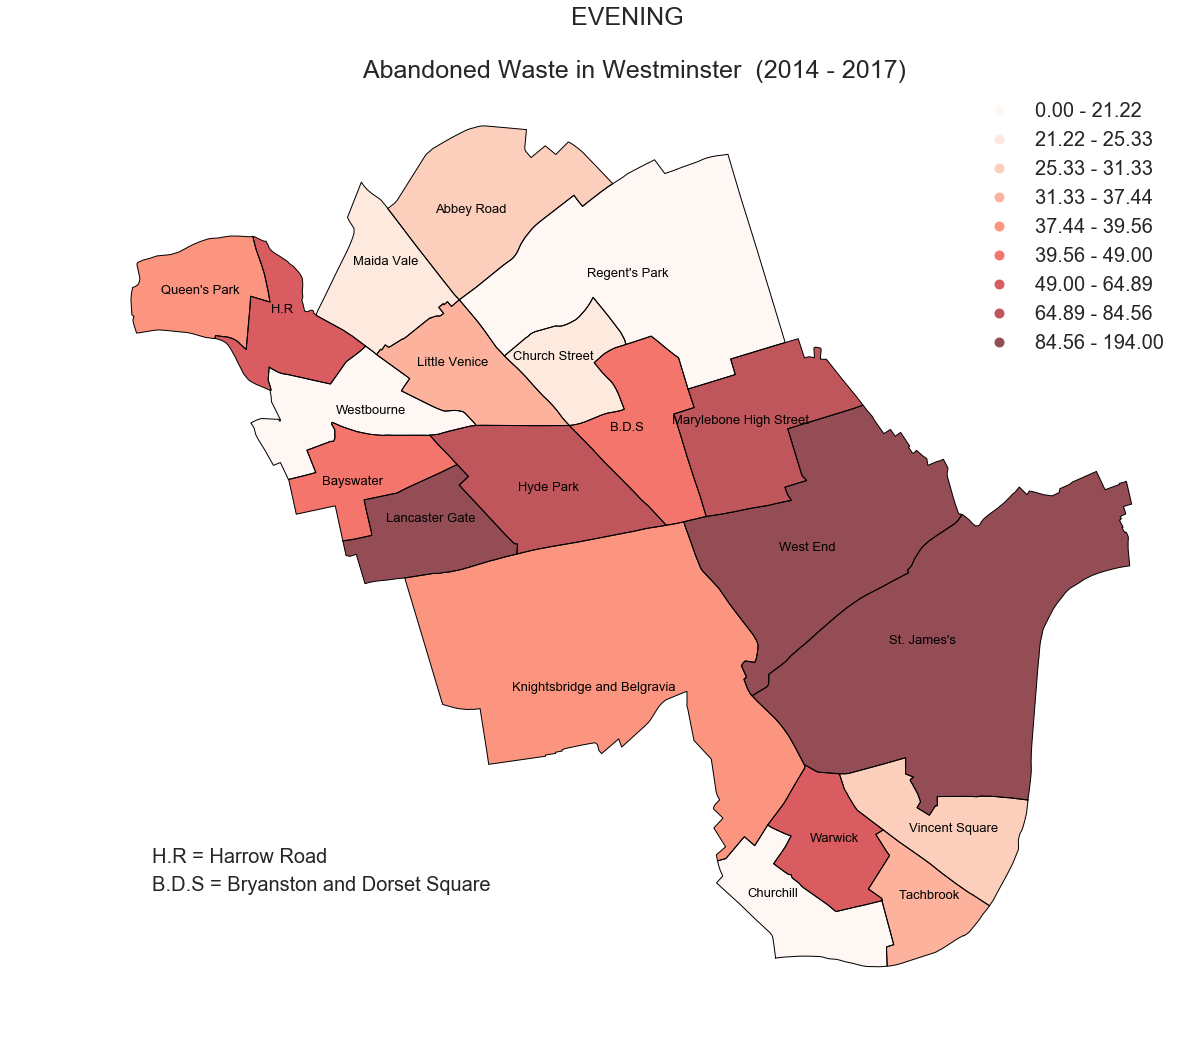

In [28]:
#plotting map abandoned waste in the evening 
sns.set(font_scale=2)
base = waste_merged.plot(figsize = (20,15), column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.7 )

plt.title('EVENING \n\n Abandoned Waste in Westminster  (2014 - 2017)',fontsize=25)
#annotating map
plt.annotate('B.D.S = Bryanston and Dorset Square', xy=(524000, 178300), fontsize=20)
plt.annotate('H.R = Harrow Road', xy=(524000, 178500), fontsize=20)
plt.axis('off')

plt.tight_layout()
#creating labels on map
waste_merged['coords'] = waste_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
waste_merged['coords'] = [coords[0] for coords in waste_merged['coords']]

for idx, row in waste_merged.iterrows():
    plt.annotate(s=row['NAME'], xy=row['coords'],horizontalalignment='center',color="Black",fontsize=13)
    

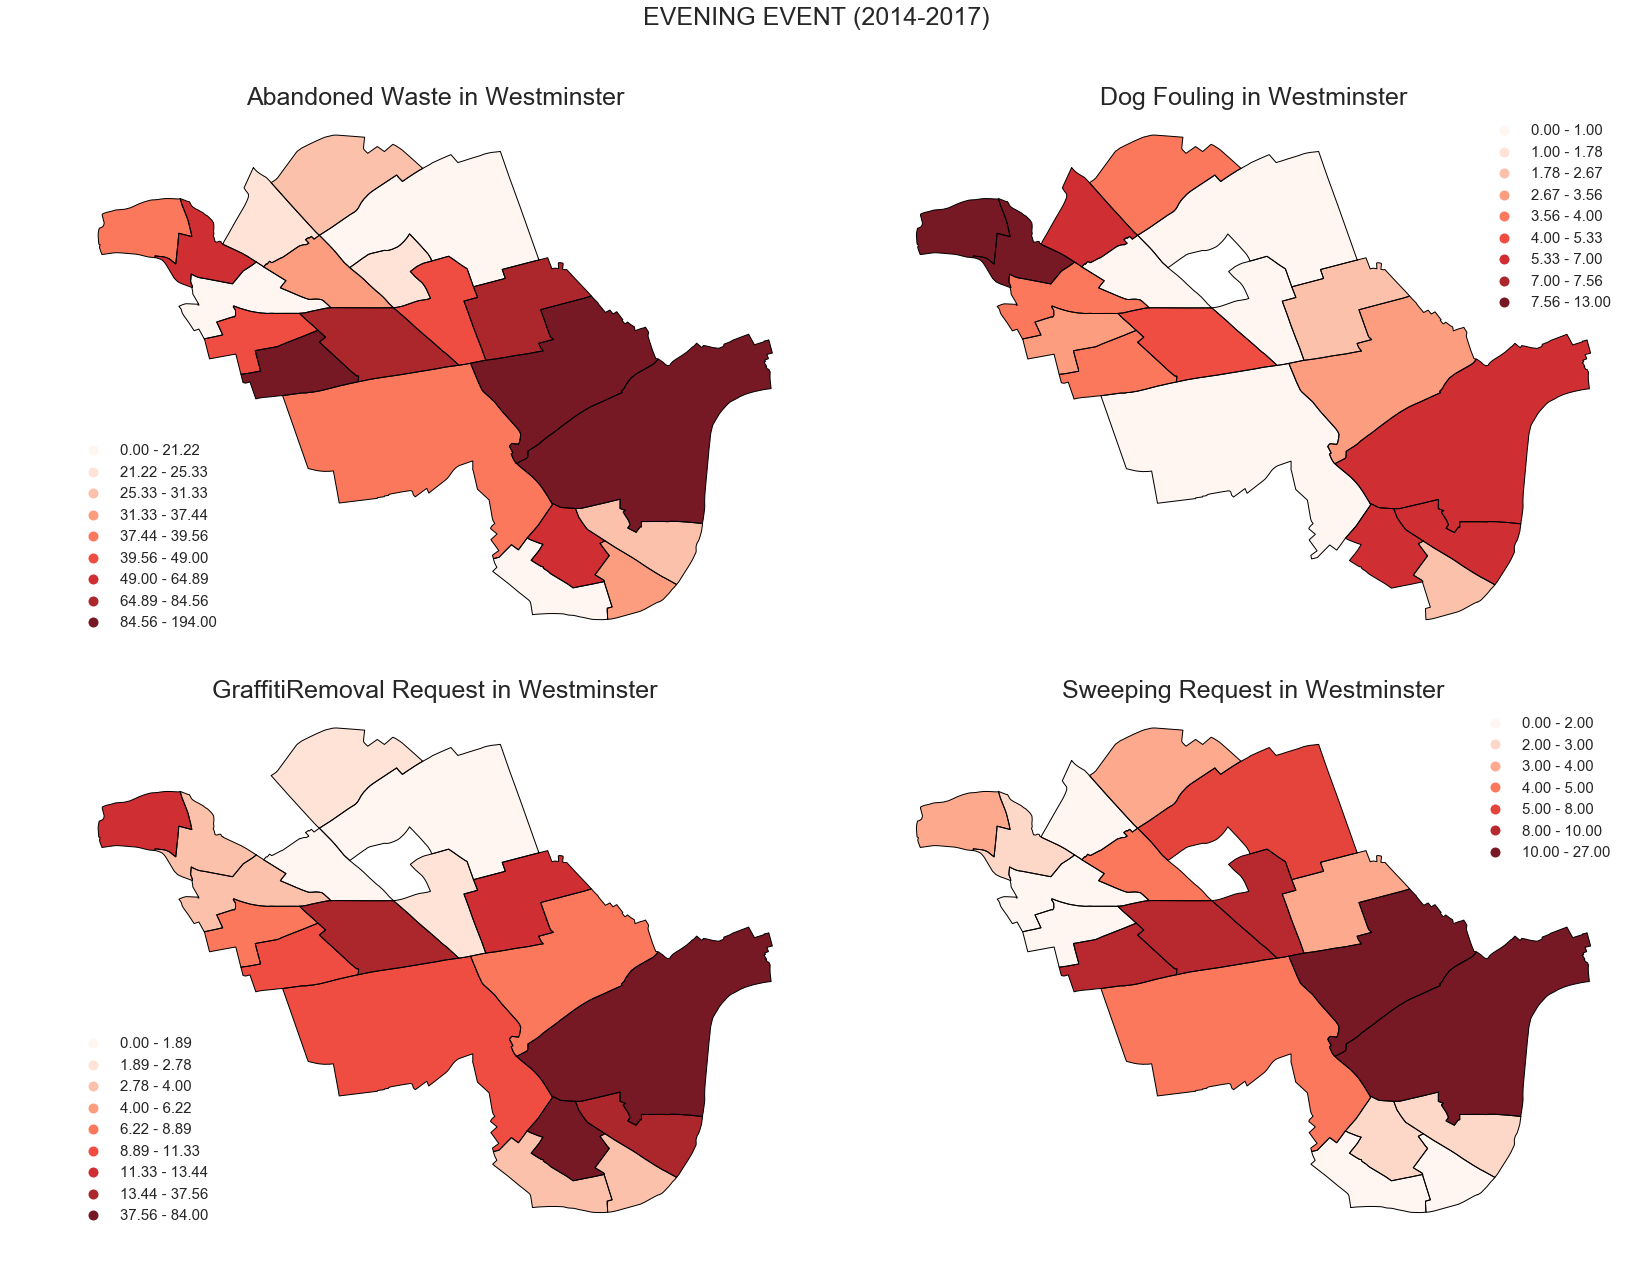

In [29]:
#sub-plotting map of cleansing event types for evening
sns.set(font_scale=1.5)
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (23,18))

waste_merged.plot(ax=ax[0][0] , column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Fouling_merged.plot(ax=ax[0][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Graffiti_merged.plot(ax=ax[1][0], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Sweeping_merged.plot(ax=ax[1][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
fig.suptitle('EVENING EVENT (2014-2017)', fontsize=25)
ax[0][0].set_title('Abandoned Waste in Westminster', fontsize=25)
ax[0][1].set_title('Dog Fouling in Westminster', fontsize=25)
ax[1][0].set_title('GraffitiRemoval Request in Westminster', fontsize=25)
ax[1][1].set_title('Sweeping Request in Westminster', fontsize=25)

ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

plt.tight_layout()
#shifting subplots down
fig.subplots_adjust(top=0.90)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/eve_cleansing1.png',bbox_inches="tight")

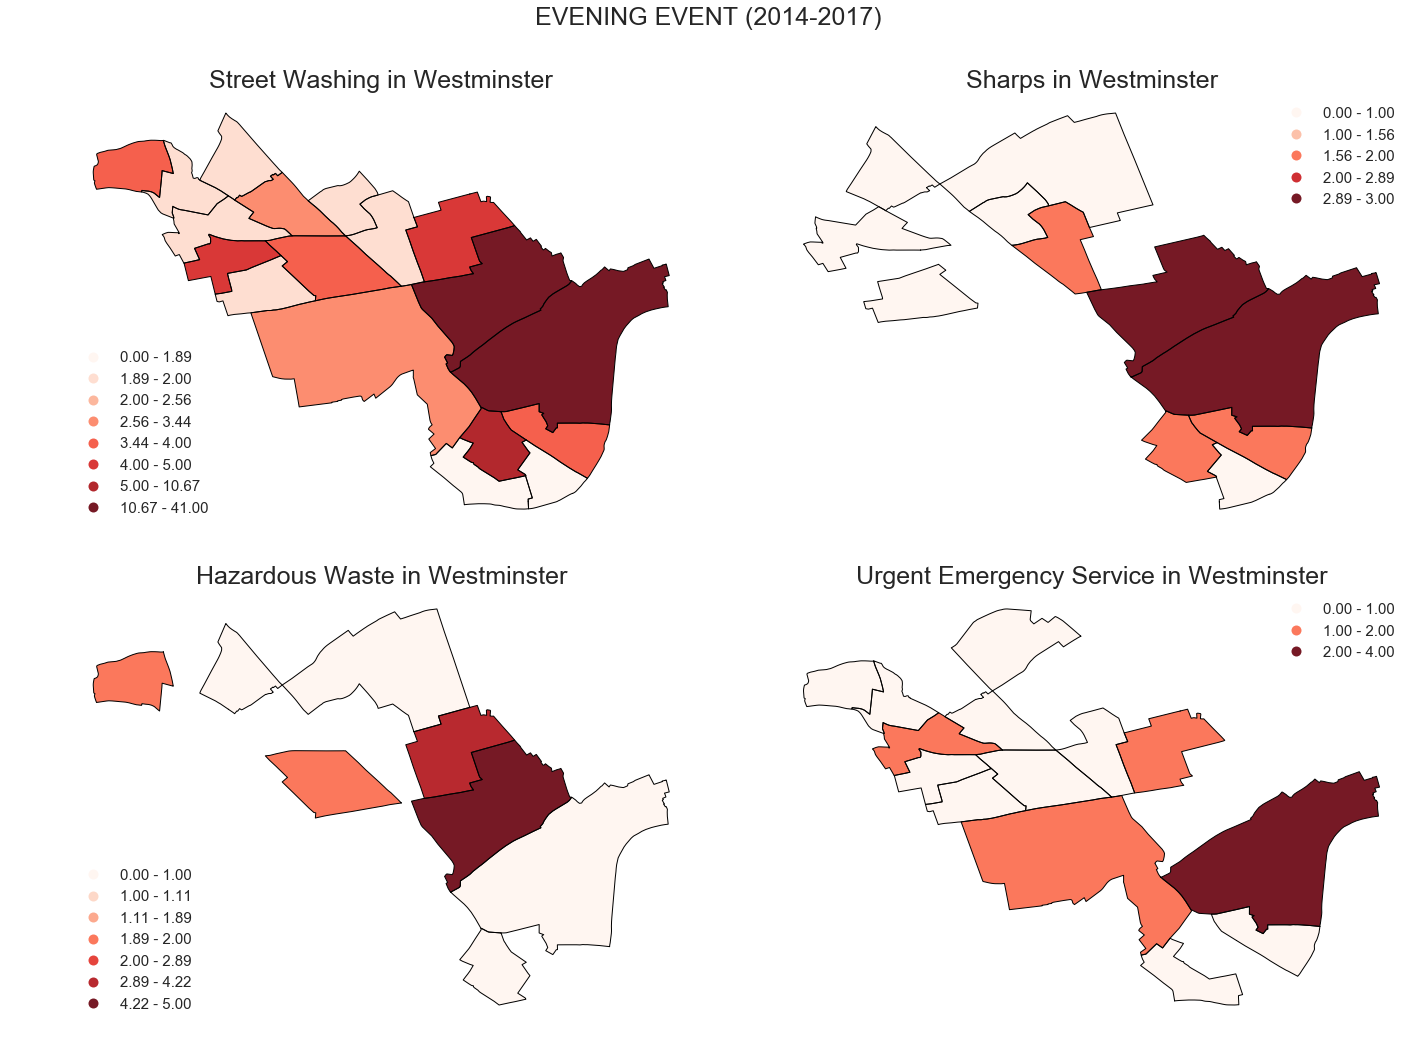

In [30]:
#sub-plotting map of cleansing event type for evening
sns.set(font_scale=1.5)
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (20,15))

Washing_merged.plot(ax=ax[0][0] , column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Sharps_merged.plot(ax=ax[0][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Hazardous_merged.plot(ax=ax[1][0], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Urgent_merged.plot(ax=ax[1][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
fig.suptitle('EVENING EVENT (2014-2017)', fontsize=25)
ax[0][0].set_title('Street Washing in Westminster', fontsize=25)
ax[0][1].set_title('Sharps in Westminster', fontsize=25)
ax[1][0].set_title('Hazardous Waste in Westminster', fontsize=25)
ax[1][1].set_title('Urgent Emergency Service in Westminster', fontsize=25)

ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

plt.tight_layout()
#shifting subplots down
fig.subplots_adjust(top=0.90)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/eve_cleansing2.png',bbox_inches="tight")

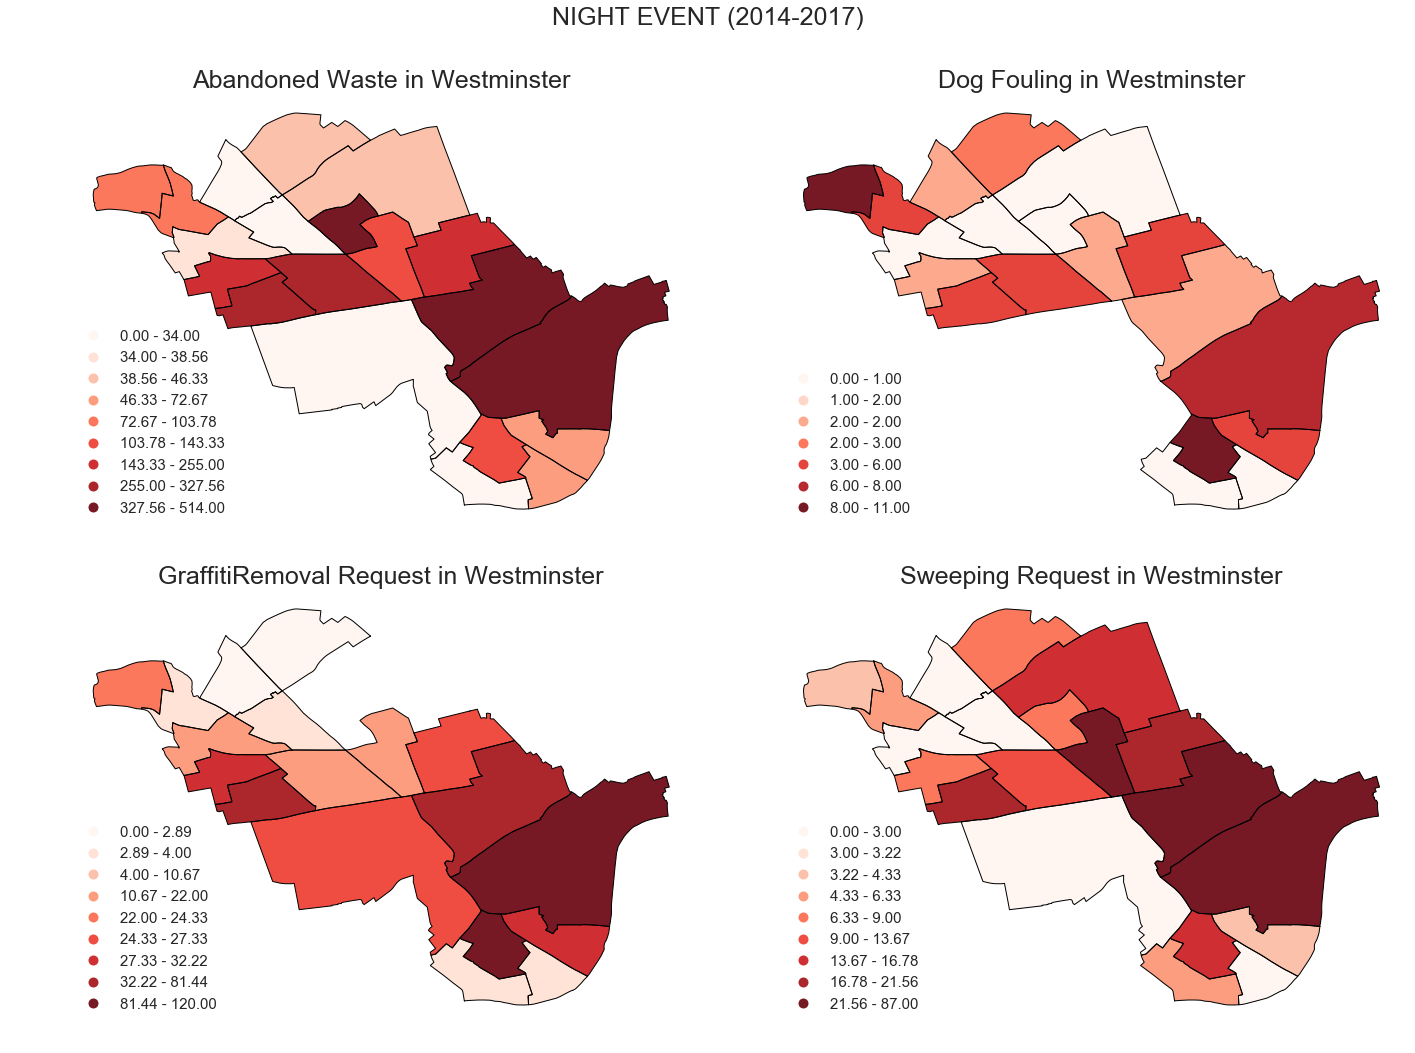

In [31]:
#sub-plotting map of cleansing event type for night-time
sns.set(font_scale=1.5)
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (20,15))

waste_merged2.plot(ax=ax[0][0] , column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Fouling_merged2.plot(ax=ax[0][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Graffiti_merged2.plot(ax=ax[1][0], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Sweeping_merged2.plot(ax=ax[1][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
fig.suptitle('NIGHT EVENT (2014-2017)', fontsize=25)
ax[0][0].set_title('Abandoned Waste in Westminster', fontsize=25)
ax[0][1].set_title('Dog Fouling in Westminster', fontsize=25)
ax[1][0].set_title('GraffitiRemoval Request in Westminster', fontsize=25)
ax[1][1].set_title('Sweeping Request in Westminster', fontsize=25)

ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

plt.tight_layout()
#shifting subplots down
fig.subplots_adjust(top=0.90)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/night_cleansing1.png',bbox_inches="tight")

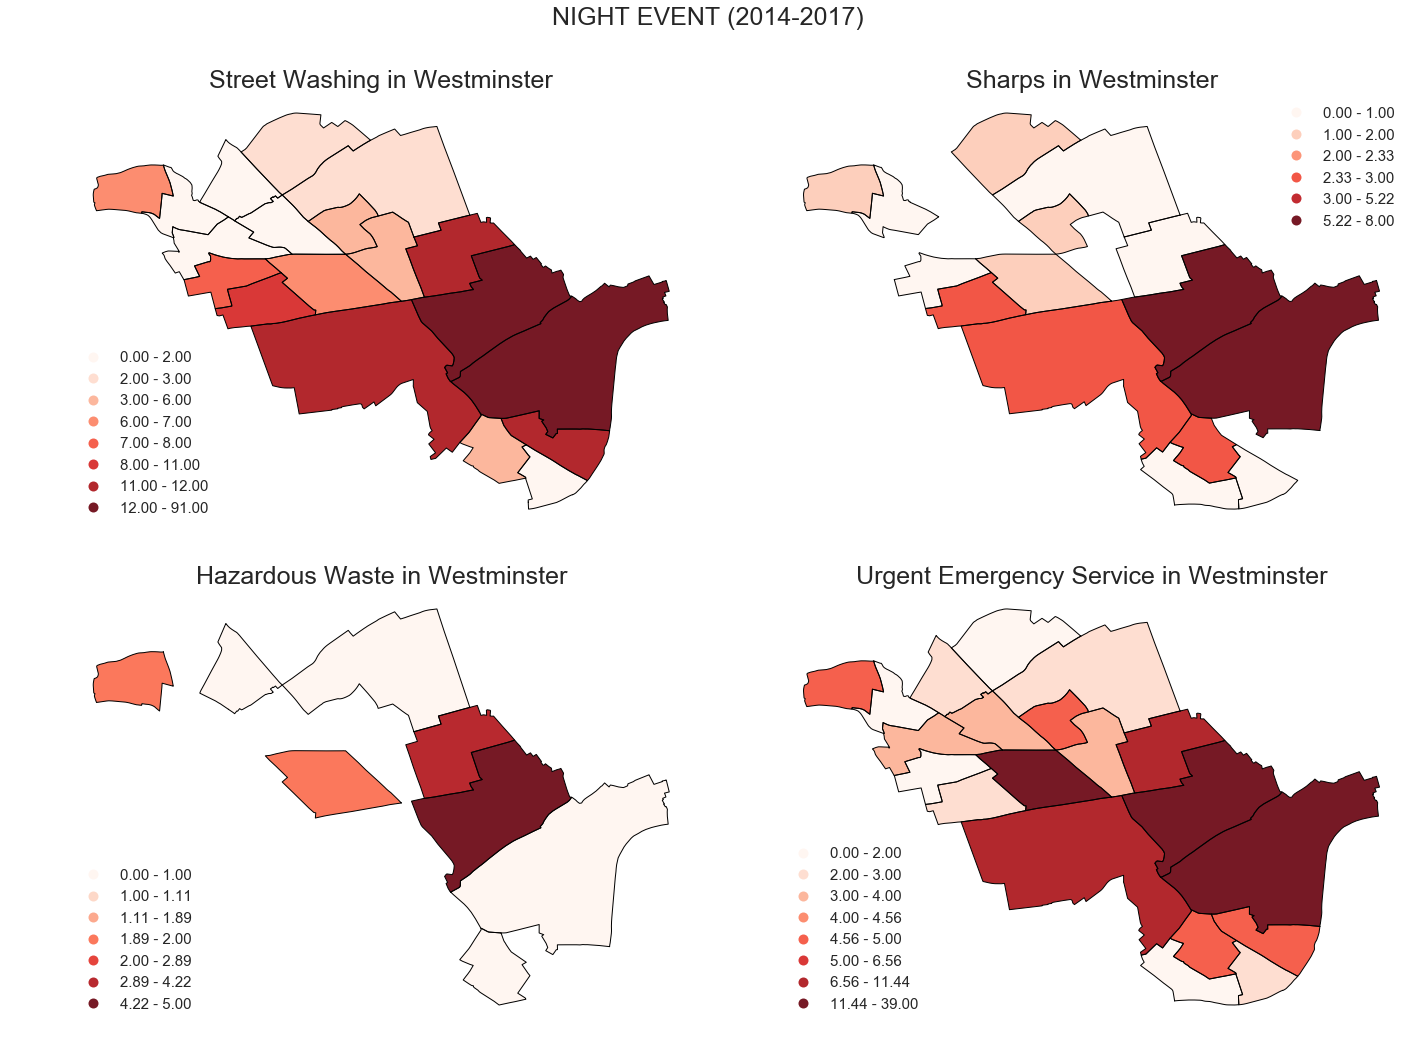

In [32]:
#sub-plotting map of cleansing event type for night-time
sns.set(font_scale=1.5)
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (20,15))

Washing_merged2.plot(ax=ax[0][0] , column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Sharps_merged2.plot(ax=ax[0][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Hazardous_merged2.plot(ax=ax[1][0], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
Urgent_merged2.plot(ax=ax[1][1], column = 'EventType',
                         scheme = 'Quantiles', cmap=plt.cm.Reds, legend = True , k = 9, alpha=0.9 )
fig.suptitle('NIGHT EVENT (2014-2017)', fontsize=25)
ax[0][0].set_title('Street Washing in Westminster', fontsize=25)
ax[0][1].set_title('Sharps in Westminster', fontsize=25)
ax[1][0].set_title('Hazardous Waste in Westminster', fontsize=25)
ax[1][1].set_title('Urgent Emergency Service in Westminster', fontsize=25)

ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

plt.tight_layout()
#shifting subplots down
fig.subplots_adjust(top=0.90)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/night_cleansing2.png',bbox_inches="tight")

# SECTION C

STRESS AREA ANALYSIS

The stress areas namely, West End, Edgware Road and Queensway/Bayswater needs to be plotted separately due to their
impact in Westminster. Although Edgware Road and Queensway/Bayswater do not reveal such impact explained by Westminster
it is worth showing its trends. I used the point plot in Seaborn for a better visual representation.

In [33]:
#creating copies of evening and night-time dataframes and keeping originals unchanged
evening_cleansing_copy = evening_cleansing.copy()
night_cleansing_copy = night_cleansing.copy()

In [34]:
#creating year columns
evening_cleansing_copy['Year'] = pd.DatetimeIndex(evening_cleansing_copy['EventDate']).year
night_cleansing_copy['Year'] = pd.DatetimeIndex(night_cleansing_copy['EventDate']).year

In [35]:
#counting the event types for each year and stress area
evening_cleansing_copy2 = pd.DataFrame(evening_cleansing_copy.groupby(['StressArea','Year'])['EventType'].count())
night_cleansing_copy2 = pd.DataFrame(night_cleansing_copy.groupby(['StressArea','Year'])['EventType'].count())

In [36]:
#resetting index
evening_cleansing_copy2 = evening_cleansing_copy2.reset_index()
night_cleansing_copy2 = night_cleansing_copy2.reset_index()

In [37]:
#aggregating the sum of all counts 
evening_cleansing_copy2= pd.DataFrame(evening_cleansing_copy2.groupby(['StressArea','Year'])['EventType'].sum())
night_cleansing_copy2= pd.DataFrame(night_cleansing_copy2.groupby(['StressArea','Year'])['EventType'].sum())

In [38]:
#resetting index
evening_cleansing_copy2 = evening_cleansing_copy2.reset_index()
night_cleansing_copy2 = night_cleansing_copy2.reset_index()

In [39]:
#renaming columns of the dataframes
evening_cleansing_copy2 = evening_cleansing_copy2.rename(columns={'EventType':'Total'})
night_cleansing_copy2 = night_cleansing_copy2.rename(columns={'EventType':'Total'})

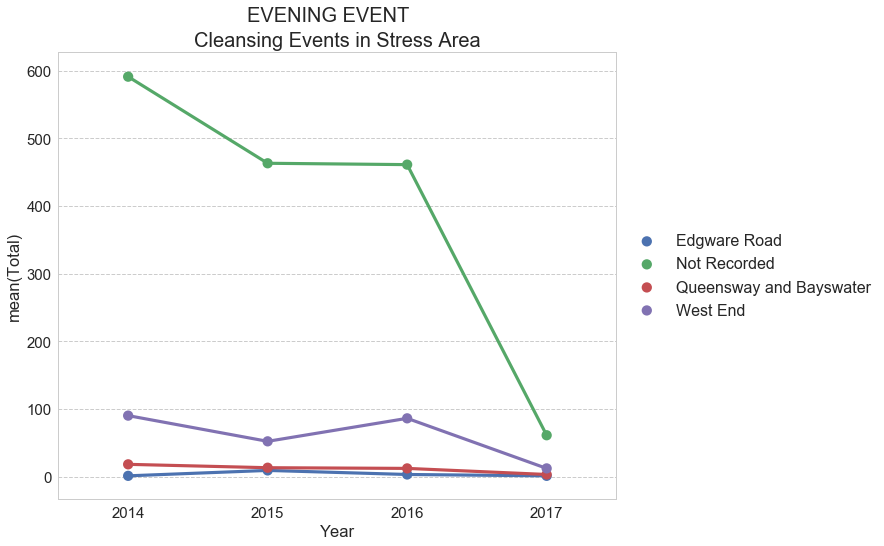

In [40]:
#creating a point plot of cleansing events for the three stress areas for evening 
plt.figure(figsize=(10,8))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.pointplot(x="Year", y="Total", hue="StressArea", data=evening_cleansing_copy2)
plt.suptitle('EVENING EVENT', fontsize=20)
plt.subplots_adjust(top=0.90)
plt.title('Cleansing Events in Stress Area', fontsize=20)
#moving legend outside of plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/point_eve_cleansing.png',bbox_inches="tight")

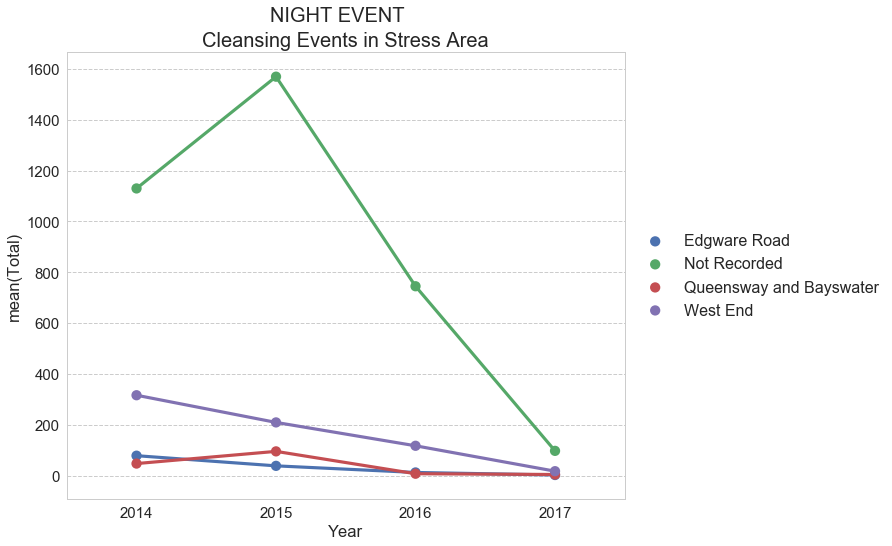

In [41]:
#creating a point plot of cleansing events for the three stress areas for night 
plt.figure(figsize=(10,8))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.pointplot(x="Year", y="Total", hue="StressArea", data=night_cleansing_copy2)
plt.suptitle('NIGHT EVENT', fontsize=20)
plt.subplots_adjust(top=0.90)
plt.title('Cleansing Events in Stress Area', fontsize=20)
#moving legend outside of plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/point_ngt_cleansing.png',bbox_inches="tight")